<a href="https://colab.research.google.com/github/Katmalu/Suicide_Rates_Overview_1985_to_2016/blob/main/Suicide_Rates_Overview_1985_to_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm
import numpy as np

In [4]:
!wget https://github.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/raw/main/master.csv

--2022-12-18 17:36:57--  https://github.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/raw/main/master.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/main/master.csv [following]
--2022-12-18 17:36:57--  https://raw.githubusercontent.com/Katmalu/Suicide_Rates_Overview_1985_to_2016/main/master.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2706377 (2.6M) [text/plain]
Saving to: ‘master.csv’

master.csv          100%[===================>]   2.58M  --.-KB/s    in 0.06s   

2022-12-18 17:36:57 (40.1 MB/s) - ‘master.csv’ saved [2706377/2706377]



In [5]:
data = pd.read_csv('master.csv')

In [7]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [ ]:
data.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
26166,Ukraine,1995,male,35-54 years,4986,6306200,79.07,Ukraine1995,0.662,"48,213,868,178",996,Boomers
21779,Saint Vincent and Grenadines,2003,female,15-24 years,0,10526,0.00,Saint Vincent and Grenadines2003,NaN,"481,806,296",4902,Millenials
4101,Belize,2012,male,25-34 years,6,25854,23.21,Belize2012,0.716,"1,573,670,250",5264,Millenials
2423,Bahamas,1996,female,35-54 years,0,32794,0.00,Bahamas1996,NaN,"3,609,000,000",14297,Boomers
12530,Israel,1994,female,55-74 years,32,370200,8.64,Israel1994,NaN,"86,307,135,997",17814,Silent
11245,Guyana,2004,male,25-34 years,42,56522,74.31,Guyana2004,NaN,"785,918,770",1180,Generation X
9311,France,2003,female,15-24 years,141,3855507,3.66,France2003,NaN,"1,840,480,812,641",32656,Millenials
11447,Hungary,1997,female,5-14 years,2,614597,0.33,Hungary1997,NaN,"47,290,180,589",4856,Millenials
22186,Seychelles,1985,male,55-74 years,1,2800,35.71,Seychelles1985,NaN,"168,887,539",2947,G.I. Generation
16227,Mauritius,1988,female,5-14 years,2,105100,1.90,Mauritius1988,NaN,"2,143,484,488",2317,Generation X


# **Описание и проверка данных:**
**country** - страна

**year** - год за который собраны данные

**sex** - пол (male, female)

**age** - возраст

**suicides_no** - количество суицидов для данной гендерно-возрастной категории

**population** - количество людей для данной гендерно-возрастной категории

**suicides/100k** - количество суицидов на 100 тысяч населения для данной гендерно-возрастной категории

**HDI for year** - индекс человеческого развития ([ИЧР](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D1%82%D0%B8%D1%8F)) для данной страны в этом году

**gdp_for_year (\$)** - ВВП данной страны за год

**gdp_per_capita (\$)** - ВВП на душу населения данной страны за год

**generation** - [поколение](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%BE%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


для части стран или годов отсутствует ИЧР, также ВВП объект а не число. Все остальные данные полные

In [ ]:
year_pop = data[['year', 'population']].groupby(['year']).sum()
year_pop

,population
year,
1985,1008600086
1986,1029909613
1987,1095029726
1988,1054094424
1989,1225514347
1990,1466620100
1991,1489988384
1992,1569539447
1993,1530416654


In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

Заметим что для 2016 существенно меньшая выборка, так что мы удалим его

In [6]:
data = data[data['year'] < 2016]
data.rename(columns = {'gdp_per_capita ($)':'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year','suicides/100k pop' : 'suicides/100k'}, inplace = True )

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
data["gdp_for_year"] = data["gdp_for_year"].str.replace(',', '')
data["gdp_for_year"] = data["gdp_for_year"].astype(np.int64)

In [9]:
country = data['country'].unique()
contries_numb = len(country)
years_numb = len(data['year'].unique())
year_min = data['year'].min()
year_max = data['year'].max()
suicides_no = data['suicides_no'].sum()
age = list(data['age'].unique())
age.sort(key = lambda x: x.split("-")[-1])
generation = data['generation'].unique()

In [ ]:
print(f'В таблице содержатся данные по {suicides_no} случаям суицида, произошедшим в {contries_numb} странам за {years_numb} года с {year_min} по {year_max} год')

В таблице содержатся данные по 6732817 случаям суицида, произошедшим в 100 странам за 31 года с 1985 по 2015 год


In [ ]:
print(f'Список возрастных групп: {", ".join(age)}')

Список возрастных групп: 5-14 years, 15-24 years, 25-34 years, 35-54 years, 55-74 years, 75+ years


In [ ]:
print(f'Список поколений: {", ".join(generation)}')

Список поколений: Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


In [ ]:
generation_l = ["G.I. Generation", "Silent", "Boomers", "Generation X", "Millenials", "Generation Z"]

In [ ]:
generation_list = {"G.I. Generation" : [1901, 1927], "Silent" : [1928, 1945], "Boomers" : [1945, 1962], "Generation X" : [1963, 1980], "Millenials" : [1981, 1996], "Generation Z" : [1997, 2012]}

In [ ]:
for i in generation_list:
  print(f'{i} c {generation_list[i][0]} по {generation_list[i][1]} год')

G.I. Generation c 1901 по 1927 год
Silent c 1928 по 1945 год
Boomers c 1945 по 1962 год
Generation X c 1963 по 1980 год
Millenials c 1981 по 1996 год
Generation Z c 1997 по 2012 год


# Зависимость от года:

In [ ]:
year_sum = data[['year', 'suicides_no', 'population']].groupby(['year']).sum()
year_sum['suicides/100k'] = year_sum['suicides_no']*100000/year_sum['population']

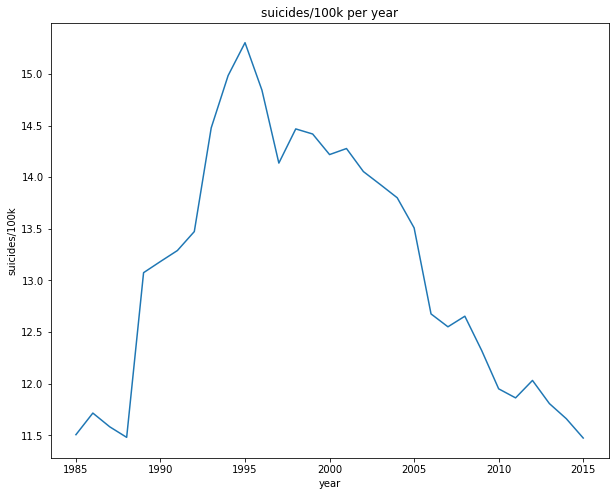

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=year_sum, y='suicides/100k', x='year')
plt.ylabel('suicides/100k')
plt.title("suicides/100k per year")
plt.show()

# Зависимость от пола:

In [ ]:
female = data[data['sex']=='female']['suicides_no'].sum()
male = data[data['sex']=='male']['suicides_no'].sum()
femalen = data[data['sex']=='female']['population'].sum()
malen = data[data['sex']=='male']['population'].sum()
print(f'В срежнем в популяции {round(malen/(malen+femalen)*100,2)}% - мужчины, {round(femalen/(malen+femalen)*100,2)}% - женщины, но при этом {round(male/(male+female)*100,2)}% суицидов были совершены мужчинами, {round(female/(male+female)*100,2)}% - женщинами')

В срежнем в популяции 48.81% - мужчины, 51.19% - женщины, но при этом 76.89% суицидов были совершены мужчинами, 23.11% - женщинами


In [ ]:
sex_sum = data[['sex', 'year', 'suicides_no']][data['sex']=='female'].groupby('year').sum()
sex_sum.rename(columns = {'suicides_no':'suicides_no_female'}, inplace = True )
sex_sum['suicides_no_male'] = data[['sex', 'year', 'suicides_no']][data['sex']=='male'].groupby('year').sum()['suicides_no']
sex_sum['population_female'] = data[['sex', 'year', 'population']][data['sex']=='female'].groupby('year').sum()['population']
sex_sum['population_male'] = data[['sex', 'year', 'population']][data['sex']=='male'].groupby('year').sum()['population']
sex_sum['suicides/100k_female'] = sex_sum['suicides_no_female']*100000/sex_sum['population_female']
sex_sum['suicides/100k_male'] = sex_sum['suicides_no_male']*100000/sex_sum['population_male']

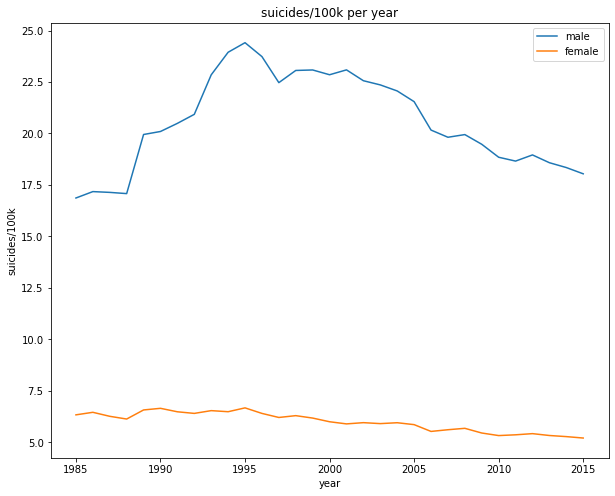

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=sex_sum, y='suicides/100k_male', x='year')
sns.lineplot(data=sex_sum, y='suicides/100k_female', x='year')
plt.legend(['male', 'female'])
plt.ylabel('suicides/100k')
plt.title("suicides/100k per year")
plt.show()

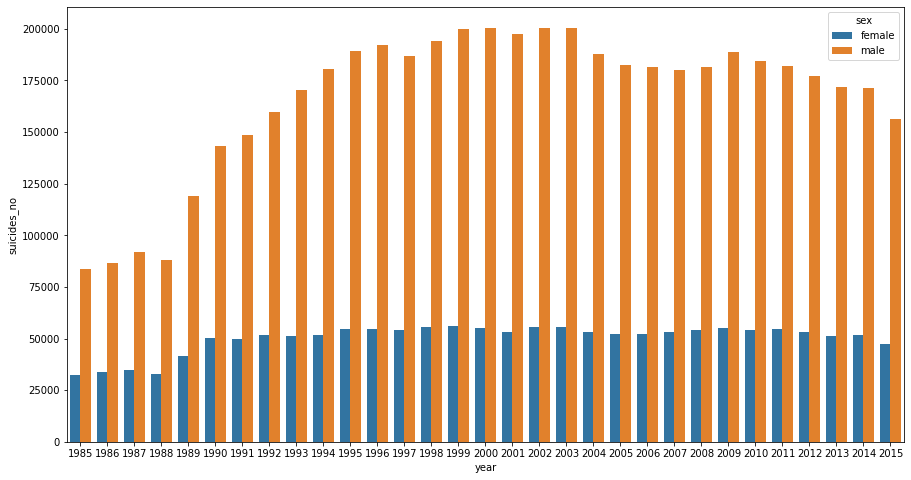

In [ ]:
plt.figure(figsize=(15,8))
graph = data[['sex', 'year', 'suicides_no']].groupby(["year","sex"]).sum()
graph = graph.reset_index()
sns.barplot(data=graph, y='suicides_no', x='year', hue = "sex")

# Поколения и возраста:

In [ ]:
gen = data.groupby(["year", "generation"])["suicides_no", "population"].sum()
gen["suicides/100k"] = gen["suicides_no"]*100000/gen["population"]
gen

<ipython-input-50-45d9fa12a8f6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen = data.groupby(["year", "generation"])["suicides_no", "population"].sum()


suicides_no  population  suicides/100k
year generation                                             
1985 Boomers                20771   173536624      11.969231
     G.I. Generation        40690   192849873      21.099314
     Generation X           18854   396166961       4.759105
     Silent                 35748   246046628      14.528953
1986 Boomers                21685   176214788      12.306005
...                           ...         ...            ...
2015 Boomers                53588   354566127      15.113683
     Generation X           71298   515972039      13.818191
     Generation Z            1681   246636333       0.681570
     Millenials             53959   540924338       9.975332
     Silent                 23114   116559095      19.830284

[142 rows x 3 columns]

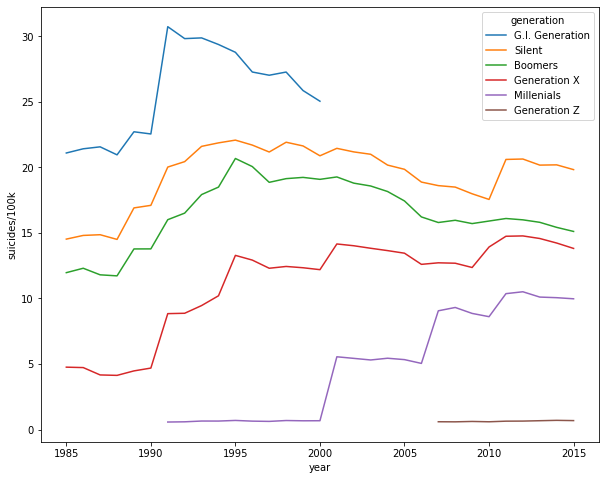

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=gen, y='suicides/100k', x='year', hue = "generation", hue_order = generation_l)

In [ ]:
age_graph = data.groupby(["year", "age"])["suicides_no", "population"].sum()
age_graph["suicides/100k"] = age_graph["suicides_no"]*100000/age_graph["population"]
age_graph

<ipython-input-94-891262ba43c1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_graph = data.groupby(["year", "age"])["suicides_no", "population"].sum()


suicides_no  population  suicides/100k
year age                                                
1985 15-24 years        17870   196974439       9.072243
     25-34 years        20771   173536624      11.969231
     35-54 years        35748   246046628      14.528953
     5-14 years           984   199192522       0.493994
     55-74 years        28736   152769432      18.810046
...                       ...         ...            ...
2015 25-34 years        32118   279250191      11.501514
     35-54 years        71298   515972039      13.818191
     5-14 years          1681   246636333       0.681570
     55-74 years        53588   354566127      15.113683
     75+ years          23114   116559095      19.830284

[186 rows x 3 columns]

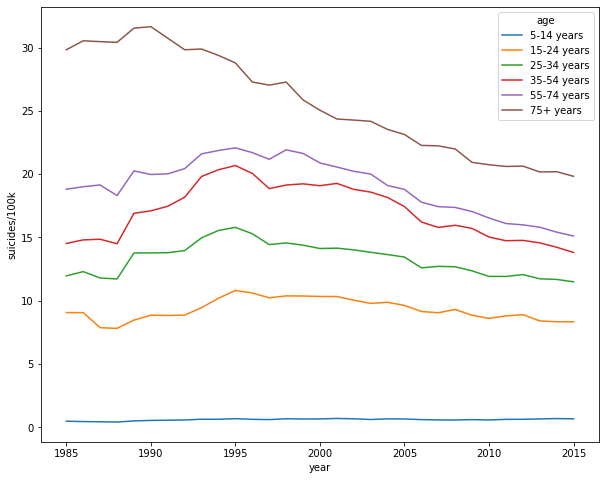

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=age_graph, y='suicides/100k', x='year', hue = "age", hue_order = age)

# Аналитика по странам:

In [10]:
country_graph = data[['country', 'year', 'sex', 'suicides_no', 'population']].groupby(['country', 'year', 'sex']).sum()
country_graph['gdp_per_capita'] = data.groupby(['country', 'year', 'sex']).mean()['gdp_per_capita']
country_graph = country_graph.reset_index()
country_graph['suicides/100k'] = country_graph['suicides_no']*100000/country_graph['population']
country_graph

,country,year,sex,suicides_no,population,gdp_per_capita,suicides/100k
0,Albania,1987,female,25,1316900,796.0,1.898398
1,Albania,1987,male,48,1392700,796.0,3.446543
2,Albania,1988,female,22,1343600,769.0,1.637392
3,Albania,1988,male,41,1420700,769.0,2.885901
4,Albania,1989,female,15,1363300,833.0,1.100271
...,...,...,...,...,...,...,...
4605,Uzbekistan,2012,male,1220,13077518,1964.0,9.328987
4606,Uzbekistan,2013,female,628,13531933,2150.0,4.640874
4607,Uzbekistan,2013,male,1322,13306991,2150.0,9.934628
4608,Uzbekistan,2014,female,690,13767888,2309.0,5.011662


Для России

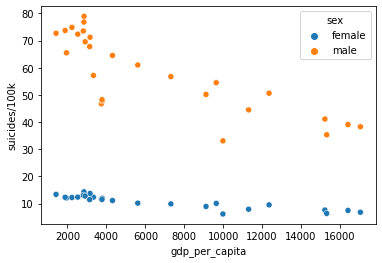

In [11]:
sns.scatterplot(data=country_graph[country_graph['country'] == "Russian Federation"], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "sex")

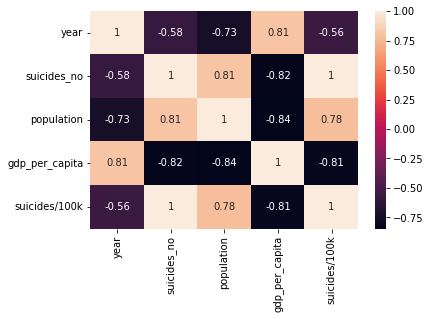

In [80]:
sns.heatmap(country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "male")].corr(), annot = True)

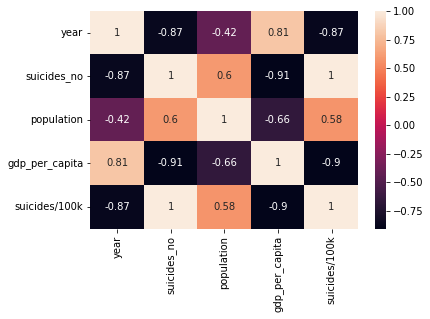

In [81]:
sns.heatmap(country_graph[(country_graph['country'] == "Russian Federation") & (country_graph['sex'] == "female")].corr(), annot = True)

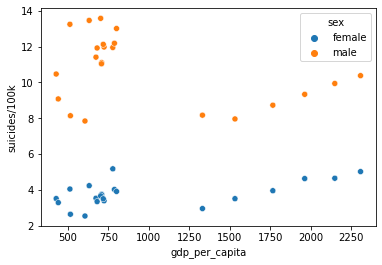

In [82]:
sns.scatterplot(data=country_graph[country_graph['country'] == "Uzbekistan"], y='suicides/100k', x='gdp_per_capita', ci = None, hue = "sex")

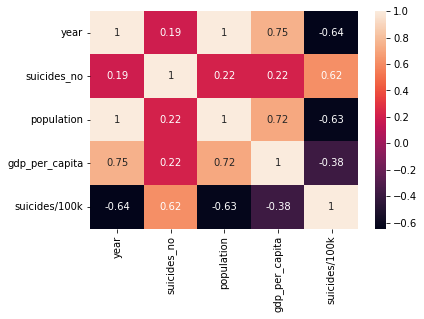

In [83]:
sns.heatmap(country_graph[(country_graph['country'] == "Uzbekistan") & (country_graph['sex'] == "male")].corr(), annot = True)

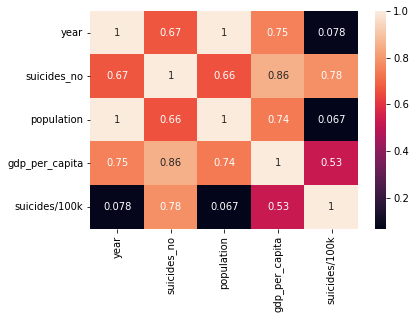

In [84]:
sns.heatmap(country_graph[(country_graph['country'] == "Uzbekistan") & (country_graph['sex'] == "female")].corr(), annot = True)

# Может понадобиться а может и нет

In [ ]:
data[['year', 'country']].groupby('year')['country'].nunique()

year
1985    48
1986    48
1987    54
1988    49
1989    52
1990    64
1991    64
1992    65
1993    65
1994    68
1995    78
1996    77
1997    77
1998    79
1999    83
2000    86
2001    88
2002    86
2003    86
2004    84
2005    84
2006    85
2007    86
2008    85
2009    89
2010    88
2011    86
2012    81
2013    80
2014    78
2015    62
Name: country, dtype: int64

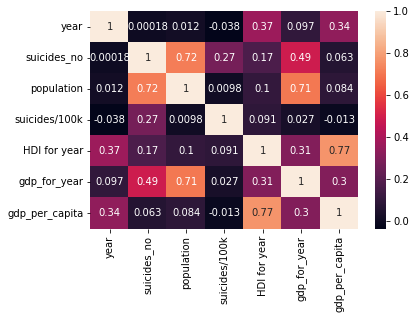

In [ ]:
sns.heatmap(data[data['sex'] == 'male'].corr(),annot=True)

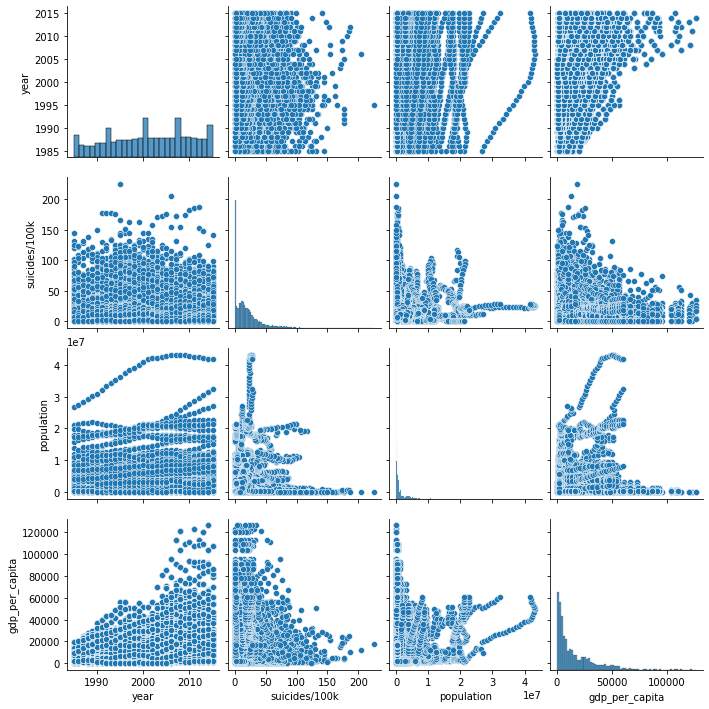

In [ ]:
sns.pairplot(data = data[data['sex'] == 'male'], vars = ['year', 'suicides/100k', 'population', 'gdp_per_capita'])

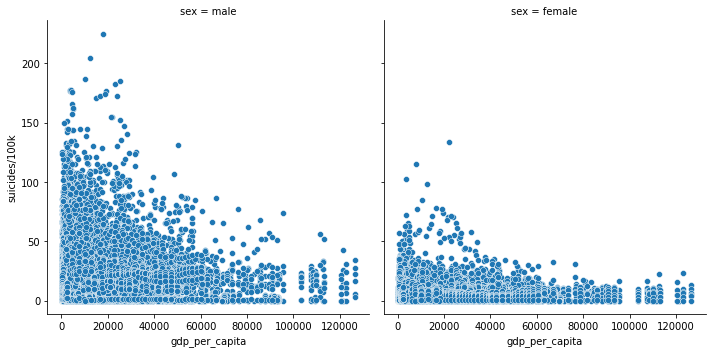

In [ ]:
sns.relplot(data = data, y='suicides/100k', x='gdp_per_capita', ci = None, col = "sex")

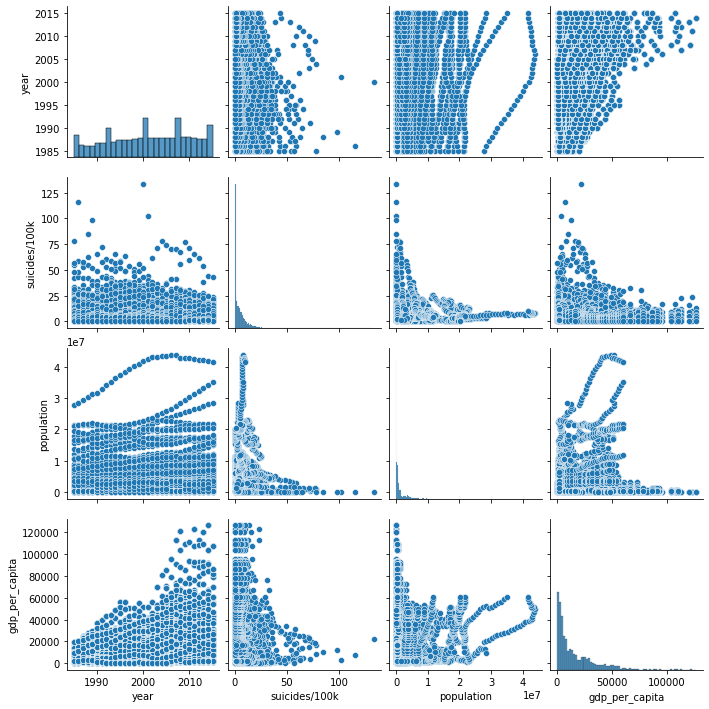

In [ ]:
sns.pairplot(data = data[data['sex'] == 'female'], vars = ['year', 'suicides/100k', 'population', 'gdp_per_capita'])

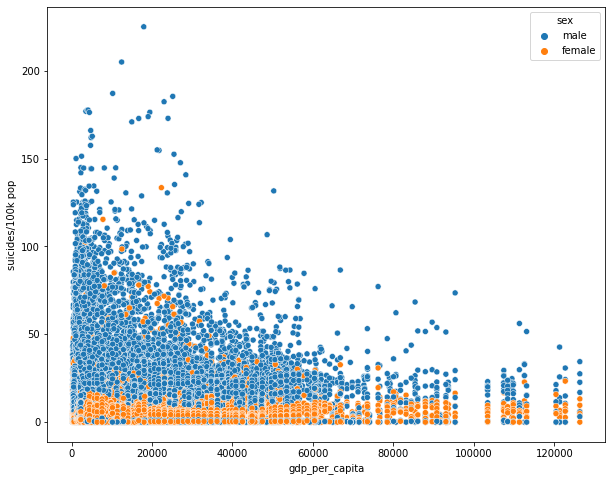

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, y = "suicides/100k", x = 'gdp_per_capita', hue = "sex")

In [ ]:
cuntry_graph = data.groupby(["country"])["suicides_no", "population"].sum()
cuntry_graph["suicides/100k"] = cuntry_graph["suicides_no"]*100000/cuntry_graph["population"]
cuntry_graph

<ipython-input-55-9ae743fc1f91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cuntry_graph = data.groupby(["country"])["suicides_no", "population"].sum()


,suicides_no,population,suicides/100k
country,,,
Albania,1970,62325467,3.160827
Antigua and Barbuda,11,1990228,0.552700
Argentina,82219,1035985431,7.936309
Armenia,1838,74948140,2.452362
Aruba,101,1259677,8.017928
...,...,...,...
United Arab Emirates,622,36502275,1.704003
United Kingdom,136805,1738767780,7.867928
United States,1034013,8054027201,12.838459


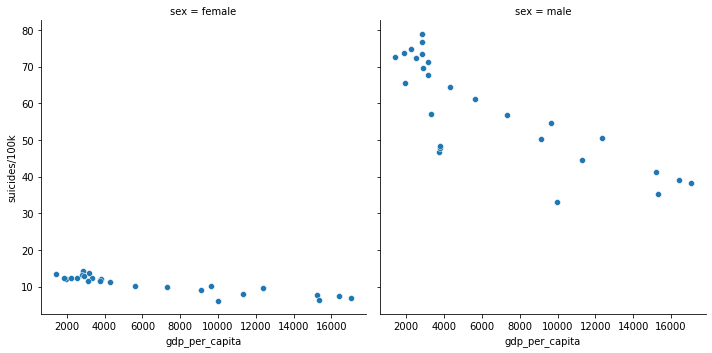

In [79]:
sns.relplot(data=country_graph[country_graph['country'] == "Russian Federation"], y='suicides/100k', x='gdp_per_capita', col = "sex", kind="scatter")

In [ ]:
corr_list = []
for c in country_graph['country']:
  country_graph[(['country'] == i) & (country_graph['sex'] == "female")].corr()
graf_corr = 